In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
x = 2
y = 3
print(x+y)

5


# Entrenando nuestro segundo modelo de audio: problemas de clasificación

Revisaremos progresivamente como funciona el cálculo del gradiente descendiente para un problema de regresión logíistica con 1D o una sola característica y dos posibles clases. 

Luego, extendemos este problema para 2 características y 2 clases. 
Damos un tercer paso, conociendo uno de los datasets más famosos en el *Hello World* del machine learning. 
Finalmente, entrenaremos un modelo de audio con algunas características que estudiamos la clase pasada. 

## Abriendo cuentas sobre regresión logística

Abramos cuentas y observemos un ejemplo pequeño, con solo una variable de entrada y una de salida!

$X$ inputs, $y$ outputs (clases). 

In [ ]:
X = np.array([[0.5], [1], [1.5], [3], [2], [2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [ ]:
X

array([[0.5],
       [1. ],
       [1.5],
       [3. ],
       [2. ],
       [2.5]])

Observemos los puntos: son claramente separables por una función sigmoide!

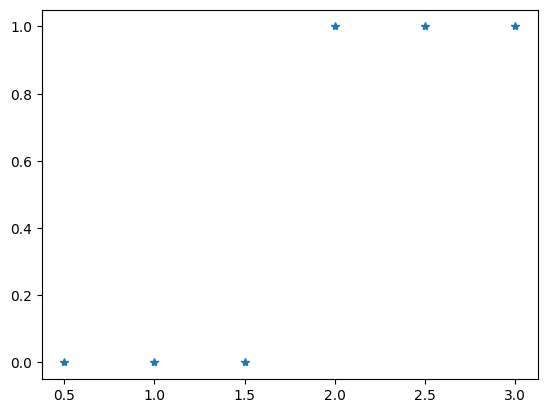

In [ ]:
plt.plot(X,y,'*')

Primera Iteración utilizando $\alpha = 0.1$, $\theta_{0}^{0} = 0$ y $\theta_{1}^{0} = 0$

$
\begin{equation}
\theta_{0}^{k+1} = \theta_{0}^{k} -\alpha \left( \dfrac{1}{6}\displaystyle \sum_{i=1}^{6} \sigma(x_i - y_i) \right)
\end{equation}
$

$
\begin{equation}
\theta_{1}^{k+1} = \theta_{1}^{k} -\alpha \left( \dfrac{1}{6}\displaystyle \sum_{i=1}^{6} \sigma(x_i - y_i)x_i \right)
\end{equation}
$

In [ ]:
alpha = 0.1
theta_0_0 = 0
theta_1_0 = 0
n = len(X)
thetas = np.array([theta_1_0, theta_0_0])

In [ ]:
def sigma_func(x,thetas):
    return 1/(1+np.exp(-1*(thetas[1]*x+thetas[0])))

Primera Iteración

In [ ]:
theta_0_1 = theta_0_0 - alpha * (1/n) * np.sum((sigma_func(X,thetas)))

In [ ]:
theta_1_1 = theta_1_0 - alpha * (1/n) * np.sum((sigma_func(X,thetas))*X)

In [ ]:
print("Resultados")
print(theta_0_1)
print(theta_1_1)

Resultados
-0.05
-0.0875


In [ ]:
thetas = np.array([theta_1_1, theta_0_1])

Segunda Iteración

In [ ]:
theta_0_2 = theta_0_1 - alpha * (1/n) * np.sum((sigma_func(X,thetas)))
theta_1_2 = theta_1_1 - alpha * (1/n) * np.sum((sigma_func(X,thetas))*X)
thetas = np.array([theta_1_1, theta_0_1])
print("Resultados")
print(thetas)

Resultados
[-0.0875 -0.05  ]


## Utilizando una librería con el codigo optimizado para esta tarea

Utilizando ```scikit-learn``` 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

Aquí calculamos por primera vez una medida o métrica para evaluar un modelo. Existen muchisimas métricas diferentes para evaluar que tan bien se encuentra clasificando. En este caso particular, estamos calculando una medida que se denomina accuracy. Se define por: 

$
\mathtt{Accuracy} = \dfrac{TP+TN}{TP+FP+TN+FN}
$

Donde la clase $y_{i} = 1$ la consideramos **Positiva** $(P)$ y la clase $y_{i} = 0$ la consideramos **Negativa** $(N)$.  Cuando las entradas han sido clasificadas correctamente en su respectiva clase utilizamos la $T$ de **True** y en caso contrario la $F$ de **False**. 

Pro ejemplo, $TP$ son los casos de la clase de interés o clase 1, clasificados correctamente como clase 1. 

In [ ]:
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


Nuestro modelo tiene una puntuación perfecta, lo que se denomina en general un sobre entrenamiento o **overfitting**  

In [ ]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0


## Extensión del ejemplo: ahora con dos features. 

En tal caso nuestro modelo lineal anidado dentro de la función sigmoide podría ser dado de la siguiente manera: 

$
g_{\Theta}(x) = \theta_{2}x_{2}^{(i)}+\theta_{1}x_{1}^{(i)} + \theta_{0}
$

Donde el sub-indice de $x_{j}^{(i)}$ representa el indice asociado al feature y el supra indice estaría asociado al número del ejemplo de entrenamiento. veamos este nuevo ejemplo

In [ ]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [ ]:
X

array([[0.5, 1.5],
       [1. , 1. ],
       [1.5, 0.5],
       [3. , 0.5],
       [2. , 2. ],
       [1. , 2.5]])

In [ ]:
y

array([0, 0, 0, 1, 1, 1])

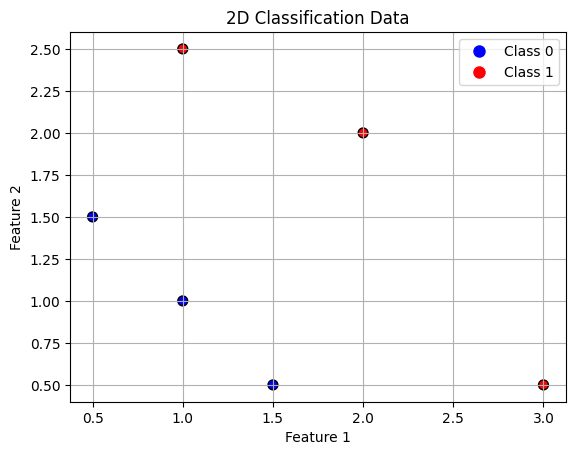

In [ ]:
# Colors based on class
colors = ['blue' if label == 0 else 'red' for label in y]

# Create a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=colors, s=50, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Classification Data')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Class 0', markersize=10, markerfacecolor='blue'),
                    plt.Line2D([0], [0], marker='o', color='w', label='Class 1', markersize=10, markerfacecolor='red')],
           loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


In [ ]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0


## Extendiendo a una caso de 3 features

Un famoso dataset es llamado Iris, son tres clases de flores diferentes. Cada una de las dimensiones del vector de features corresponde a características asociadas al largo de las flores, tallo etc.

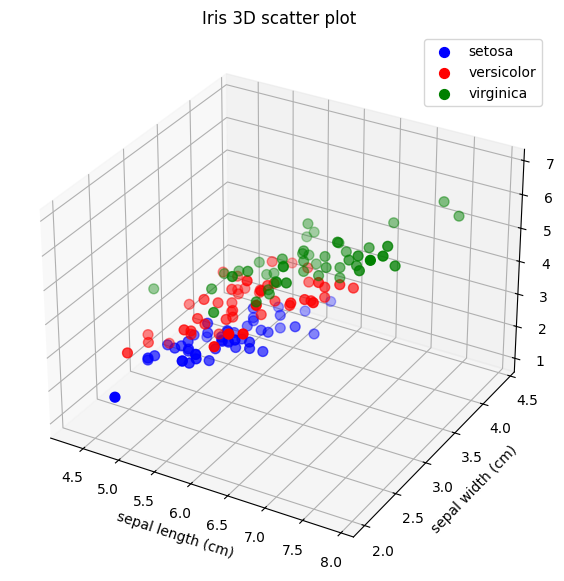

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'green']

# Scatter plot
for i in range(len(labels)):
    ax.scatter(X[y == i, 0],  # First feature
               X[y == i, 1],  # Second feature
               X[y == i, 2],  # Third feature
               label=labels[i],
               s=50,
               color=colors[i])

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title("Iris 3D scatter plot")
ax.legend()

plt.show()

In [ ]:
# 2. Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a Logistic Regression model
clf = LogisticRegression(max_iter=8) # Increased max_iter for convergence
clf.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


/Users/rodolfolobocarrasco/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Otra forma de observar como ha clasificado el modelo y ha *confundido* diferentes es clases es a través de una matrz de confusión, observen: 

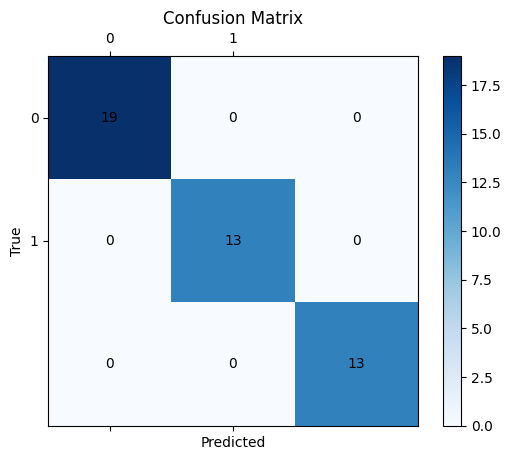

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar(cax)
classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.grid(False)

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), va='center', ha='center')

plt.show()

Nuevamente para el modelo la tarea ha sido simple de resolver. Terminemos con una extensión del modelo para muchísimas más variables en un problema con **audio**.

## Planteando un Problema de Audio

Vamos a intentar clasificar entre *kicks* y *snares*. Para eso debemos considerar que una de las grandes diferencias entre ambos objetos son las frecuencias. Es decir, inicialmente, asumimos una hipótesis desde una perspectiva de feature engineering:

- La mayor diferencia entre kicks y snares son las frecuencias.
- Utilizaremos dos maneras diferentes de extraer información frecuencial o espectral.

In [ ]:
import librosa

In [ ]:
def reduccion_de_dimension_1(signal):
    '''
    Esta funcion reduce la dimensión
    de un audio calculando el espectrograma (40,1025) en este caso y
    promediandolo obteniendo una matriz de dimension (1025,32) para cada audio.
    Como son 40 audios para cada clase tendre una matriz de 40x1025
    para cada clase, un total de 80x1025 para el data set completo.
    '''
    return np.mean(np.abs(librosa.stft(signal)),axis=1)

In [ ]:
def reduccion_de_dimension_2(signal,sr = 22050,n_mels = 40,fmax = 8000):
    '''
    Esta funcion reduce la dimensión
    de un audio calculando el espectrograma mel (40,87) en este caso y
    promediandolo obteniendo un vector de dimension 40 para cada audio.
    Como son 40 audios para cada clase tendre una matriz de 40x40
    para cada clase, un total de 80x40 (80 ejemplos de dimension 40).
    '''
    return np.mean(librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=n_mels,
                                      fmax=8000),axis=1)

Cargando los audios

In [ ]:
import pathlib
from pathlib import Path
import os

In [ ]:
main_path = os.getcwd()
MyPath = pathlib.Path(main_path)

In [ ]:
MyPath

PosixPath('/Users/rodolfolobocarrasco/Documents/projects/skeleton_env/machine-learning/machine_learning/notebooks')

In [ ]:
sr = 8000
kick_signals = [
    librosa.load(p, sr = sr)[0] for p in MyPath.glob('data/kick/Copia de Bass Sample *.wav')
]

snare_signals = [
    librosa.load(p, sr = sr)[0] for p in MyPath.glob('data/snare/Copia de Snare Sample *.wav')
]

In [ ]:
print(f"Total de Kicks cargados: {len(kick_signals)} ")
print(f"Total de Snares cargados: {len(snare_signals)} ")

Total de Kicks cargados: 40 
Total de Snares cargados: 40 


Observemos un ejemplo

In [ ]:
kick_signals[0]

array([-2.6417844e-04,  8.1657385e-03,  3.7222814e-02, ...,
        7.4974168e-06,  7.3690271e-06,  1.5755152e-06], dtype=float32)

In [ ]:
len(kick_signals[0])

16000

In [ ]:
np.abs(librosa.stft(kick_signals[0])).shape

(1025, 32)

Convirtiendo el audio en features (Estrategia 1)

In [ ]:
kick_features_1 = []
snare_features_1 = []

In [ ]:
for kick in kick_signals:
    output = reduccion_de_dimension_1(kick)
    kick_features_1.append(output)

In [ ]:
for snare in snare_signals:
    output = reduccion_de_dimension_1(snare)
    snare_features_1.append(output)

In [ ]:
print(f"Total de Kicks convertidos: {len(kick_features_1)} ")
print(f"Total de Snares convertidos: {len(snare_features_1)} ")

Total de Kicks convertidos: 40 
Total de Snares convertidos: 40 


Observemos un ejemplo

In [ ]:
kick_features_1[0]

array([2.1811634e-01, 3.0424660e-01, 2.8097758e-01, ..., 8.5805666e-05,
       8.5736916e-05, 8.5666354e-05], dtype=float32)

In [ ]:
len(kick_features_1[0])

1025

Concatenamos verticalmente los ejemplos

In [ ]:
X_1 = np.vstack((np.array(kick_features_1), np.array(snare_features_1)))

In [ ]:
X_1.shape

(80, 1025)

Estrategia 2

In [ ]:
kick_features_2 = []
snare_features_2 = []

In [ ]:
for kick in kick_signals:
    output = reduccion_de_dimension_2(kick)
    kick_features_2.append(output)

for snare in snare_signals:
    output = reduccion_de_dimension_2(snare)
    snare_features_2.append(output)

print(f"Total de Kicks convertidos: {len(kick_features_2)} ")
print(f"Total de Snares convertidos: {len(snare_features_2)} ")

Total de Kicks convertidos: 40 
Total de Snares convertidos: 40 


In [ ]:
X_2 = np.vstack((np.array(kick_features_2), np.array(snare_features_2)))

In [ ]:
X_2.shape

(80, 40)

## Entrenando 2 modelos diferentes con cada una de las estrategias!

Vamos a considerar los kicks como clase 1 y los snares como clase 2.

In [ ]:
vector_de_clases = np.array([1]*40 + [0]*40)

In [ ]:
vector_de_clases

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, vector_de_clases, test_size=0.1, random_state=42)

In [ ]:
lr_model_1 = LogisticRegression(max_iter=2000)
lr_model_1.fit(X_train_1, y_train_1)

LogisticRegression(max_iter=2000)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, vector_de_clases, test_size=0.1, random_state=42)

In [ ]:
lr_model_2 = LogisticRegression(max_iter=2000)
lr_model_2.fit(X_train_2, y_train_2)

LogisticRegression(max_iter=2000)

Evaluando los modelos

In [ ]:
y_pred_1 = lr_model_1.predict(X_test_1)
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
print(f"Accuracy: {accuracy_1 * 100:.2f}%")

Accuracy: 100.00%


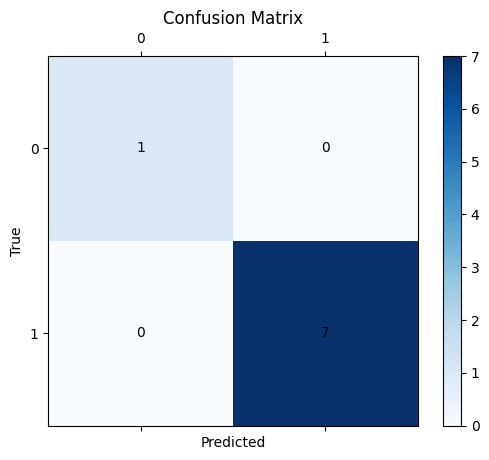

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_1, y_pred_1)

# Visualize the confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar(cax)
classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.grid(False)

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), va='center', ha='center')

plt.show()

In [ ]:
y_pred_2 = lr_model_2.predict(X_test_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print(f"Accuracy: {accuracy_2 * 100:.2f}%")

Accuracy: 100.00%


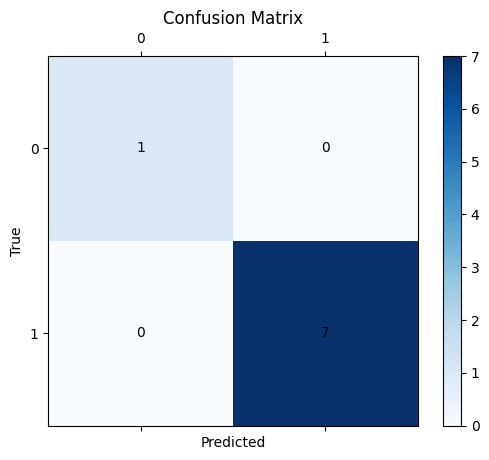

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_2, y_pred_2)

# Visualize the confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar(cax)
classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.grid(False)

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), va='center', ha='center')

plt.show()

### Estrategia 3: un camino errado

Utilicemos otra característica no tan "buena" como la Energía

In [ ]:
def reduccion_de_dimension_3(signal):
    return librosa.feature.rms(y = signal)[0]

In [ ]:
kick_features_3 = []
snare_features_3 = []

In [ ]:
for kick in kick_signals:
    output = reduccion_de_dimension_3(kick)
    kick_features_3.append(output)

for snare in snare_signals:
    output = reduccion_de_dimension_3(snare)
    snare_features_3.append(output)

print(f"Total de Kicks convertidos: {len(kick_features_3)} ")
print(f"Total de Snares convertidos: {len(snare_features_3)} ")

Total de Kicks convertidos: 40 
Total de Snares convertidos: 40 


Observemos un ejemplo

In [ ]:
kick_features_3[0]

array([1.74331069e-01, 1.75930783e-01, 1.76349938e-01, 7.22898841e-02,
       2.75975689e-02, 1.46144973e-02, 8.47862940e-03, 6.40620012e-03,
       4.73568588e-03, 3.31885763e-03, 2.38071941e-03, 1.90207176e-03,
       1.42702204e-03, 1.14400196e-03, 8.71184922e-04, 6.51815848e-04,
       5.17332868e-04, 3.72721028e-04, 2.70934135e-04, 1.92662686e-04,
       1.35607348e-04, 9.79839606e-05, 7.82639108e-05, 5.35385152e-05,
       4.34682697e-05, 3.62129540e-05, 2.91503820e-05, 2.45656393e-05,
       1.96127512e-05, 1.62796041e-05, 1.32432669e-05, 1.00327625e-05],
      dtype=float32)

In [ ]:
len(kick_features_3[0])

32

In [ ]:
X_3 = np.vstack((np.array(kick_features_3), np.array(snare_features_3)))

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, vector_de_clases, test_size=0.1, random_state=42)

In [ ]:
lr_model_3 = LogisticRegression(max_iter=2000)
lr_model_3.fit(X_train_3, y_train_3)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred_3 = lr_model_3.predict(X_test_3)
accuracy_3 = accuracy_score(y_test_3, y_pred_3)
print(f"Accuracy: {accuracy_3 * 100:.2f}%")

Accuracy: 25.00%


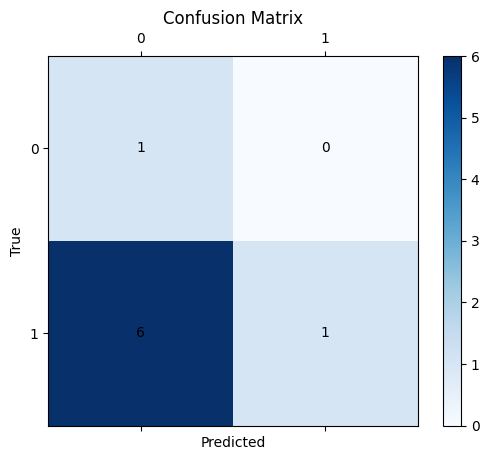

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_3, y_pred_3)

# Visualize the confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar(cax)
classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.grid(False)

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), va='center', ha='center')

plt.show()